# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**



<img src="https://i.imgur.com/49FNOHj.jpg">

In [ ]:
import pandas as pd

# Read the colors.csv file
# The 'data/colors.csv' file path is provided, which is the location of the file containing LEGO color data.
file_path = 'data/colors.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
# This helps us see what the data looks like and what columns are available.
print(df.head())

# Step 2: Find the total number of unique colors
# We use the .nunique() method on the 'name' column to count unique color names.
# The 'name' column is assumed to contain the names of the colors.
total_unique_colors = df['name'].nunique()
print(f'Total number of unique colors: {total_unique_colors}')

# Step 3: Count transparent and opaque colors

# Method 1: Using value_counts()
transparency_counts = df['is_trans'].value_counts()

# Retrieve the count of transparent colors ('t') and opaque colors ('f')
# .get() method is used to safely get the count, returning 0 if the key is not found.
num_transparent = transparency_counts.get('t', 0)
num_opaque = transparency_counts.get('f', 0)

# Print the counts of transparent and opaque colors
print(f'Number of transparent colors: {num_transparent}')
print(f'Number of opaque colors: {num_opaque}')

# Method 2: Using groupby() and size()
# Group the DataFrame by 'is_trans' and count the size of each group
grouped_transparency = df.groupby('is_trans').size()

# Retrieve the count of transparent colors ('t') and opaque colors ('f') from the grouped data
# .get() method is used here as well to handle cases where 't' or 'f' might not be present.
num_transparent = grouped_transparency.get('t', 0)
num_opaque = grouped_transparency.get('f', 0)

# Print the counts of transparent and opaque colors using the groupby method
print(f'Number of transparent colors (groupby method): {num_transparent}')
print(f'Number of opaque colors (groupby method): {num_opaque}')

# Method 3: Using groupby('is_trans').count()
# Group the DataFrame by 'is_trans' and use count() to count non-null entries in each column within each group
count_transparency = df.groupby('is_trans').count()

# Since count() provides counts for each column, we can pick any column, e.g., 'name', to get the counts
num_transparent = count_transparency.loc['t', 'name'] if 't' in count_transparency.index else 0
num_opaque = count_transparency.loc['f', 'name'] if 'f' in count_transparency.index else 0

# Print the counts using the groupby().count() method
print(f'Number of transparent colors (groupby().count() method): {num_transparent}')
print(f'Number of opaque colors (groupby().count() method): {num_opaque}')



   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
Total number of unique colors: 135
Number of transparent colors: 28
Number of opaque colors: 107
Number of transparent colors (groupby method): 28
Number of opaque colors (groupby method): 107
Number of transparent colors (groupby().count() method): 28
Number of opaque colors (groupby().count() method): 107


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Read the colors.csv file
file_path = 'data/colors.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Method 1: Using value_counts()
# Count the occurrences of each unique value in the 'is_trans' column
transparency_counts = df['is_trans'].value_counts()

# Retrieve the count of transparent colors ('t') and opaque colors ('f')
# .get() method is used to safely get the count, returning 0 if the key is not found
num_transparent = transparency_counts.get('t', 0)
num_opaque = transparency_counts.get('f', 0)

# Print the counts of transparent and opaque colors
print(f'Number of transparent colors (value_counts method): {num_transparent}')
print(f'Number of opaque colors (value_counts method): {num_opaque}')

# Method 2: Using groupby() and size()
# Group the DataFrame by 'is_trans' and count the size of each group
grouped_transparency = df.groupby('is_trans').size()

# Retrieve the count of transparent colors ('t') and opaque colors ('f') from the grouped data
# .get() method is used here as well to handle cases where 't' or 'f' might not be present
num_transparent = grouped_transparency.get('t', 0)
num_opaque = grouped_transparency.get('f', 0)

# Print the counts of transparent and opaque colors using the groupby method
print(f'Number of transparent colors (groupby method): {num_transparent}')
print(f'Number of opaque colors (groupby method): {num_opaque}')


   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
Number of transparent colors (value_counts method): 28
Number of opaque colors (value_counts method): 107
Number of transparent colors (groupby method): 28
Number of opaque colors (groupby method): 107


### Understanding LEGO Themes vs. LEGO sets
walk into a LEGO store and you will see their products organised by theme. Their themes include Star wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">



A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whBlolg.png">

1. In which year were the first LEGO sets released           
and what were these sets called?

2. How many different products did the LEGO company sell in their first year of operation?

3. What are the top 5 LEGO sets with the most number of parts?

In [ ]:
# Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Display the columns in the DataFrame
print(df.columns)

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')


In [ ]:
# Find the earliest year in the dataset
first_year = df['year'].min()

# Filter the DataFrame to get the sets released in the first year
first_year_sets = df[df['year'] == first_year]

# Get the names of the sets released in the first year
first_year_set_names = first_year_sets['name'].tolist()

print(f'The first LEGO sets were released in {first_year}.')
print('These sets were called:', first_year_set_names)

The first LEGO sets were released in 1949.
These sets were called: ['Extra-Large Gift Set (ABB)', 'Large Gift Set (ABB)', 'Medium Gift Set (ABB)', 'Small Brick Set (ABB)', 'Small Doors and Windows Set (ABB)']


In [ ]:
# Count the number of different sets released in the first year
num_first_year_products = first_year_sets['set_num'].nunique()

print(f'The LEGO company sold {num_first_year_products} different products in their first year of operation.')

The LEGO company sold 5 different products in their first year of operation.


In [ ]:
# Sort the DataFrame by the number of parts in descending order
sorted_df = df.sort_values(by='num_parts', ascending=False)

# Get the top 5 LEGO sets with the most number of parts
top_5_sets = sorted_df.head(5)

print('Top 5 LEGO sets with the most number of parts:')
print(top_5_sets[['name', 'num_parts']])

Top 5 LEGO sets with the most number of parts:
                                name  num_parts
15004  The Ultimate Battle for Chima       9987
11183          UCS Millennium Falcon       7541
10551                Hogwarts Castle       6020
295                        Taj Mahal       5923
221                        Taj Mahal       5922


In [ ]:
import pandas as pd

# Step 1: Read the sets.csv file and examine the columns
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Display the columns in the DataFrame
print("\nColumns in the dataset:")
print(df.columns)

# Step 2: Answer the questions

# Question 1: In which year were the first LEGO sets released and what were these sets called?

# Find the earliest year in the dataset
first_year = df['year'].min()
print(f'\nThe first LEGO sets were released in {first_year}.')

# Filter the DataFrame to get the sets released in the first year
first_year_sets = df[df['year'] == first_year]

# Get the names of the sets released in the first year
first_year_set_names = first_year_sets['name'].tolist()
print('These sets were called:', first_year_set_names)

# Question 2: How many different products did the LEGO company sell in their first year of operation?

# Count the number of different sets released in the first year
num_first_year_products = first_year_sets['set_num'].nunique()
print(f'\nThe LEGO company sold {num_first_year_products} different products in their first year of operation.')

# Additionally, let's count the total number of sets sold in the first year
num_first_year_sets_sold = first_year_sets.shape[0]
print(f'\nTotal number of sets sold in the first year: {num_first_year_sets_sold}')

# or this way:

# Specify the first year of interest, which is 1949
first_year = 1949

# Filter the DataFrame to get the sets released in the first year
first_year_sets = df[df['year'] == first_year]


# Question 3: What are the top 5 LEGO sets with the most number of parts?

# Sort the DataFrame by the number of parts in descending order. The .sort_values() method will by default sort in ascending order.
sorted_df = df.sort_values(by='num_parts', ascending=False)

# Get the top 5 LEGO sets with the most number of parts
top_5_sets = sorted_df.head(5)
print('\nTop 5 LEGO sets with the most number of parts:')
print(top_5_sets[['name', 'num_parts']])


First few rows of the dataset:
  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

Columns in the dataset:
Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

The first LEGO sets were released in 1949.
These sets were called: ['Extra-Large Gift Set (ABB)', 'Large Gift Set (ABB)', 'Medium Gift Set (ABB)', 'Small Brick Set (ABB)', 'Small Doors and Windows Set (ABB)']

The LEGO company sold 5 different products in their first year of operation.

Total number of sets sold in the first year: 5

Top 5 LEGO sets with the most number of parts:
                                name  num_parts
15004  The Ultimate Battle for Chima       998

In [ ]:
#  Create a new Series called sets_by_year

# Group by the 'year' column and count the number of sets in each year
sets_by_year = df.groupby('year')['set_num'].count()

# Display the sets_by_year Series
print("\nNumber of sets released year-on-year:")
print(sets_by_year)

# Step 3: Compare the number of sets released in 1955 to those released in 2019

# Get the number of sets released in 1955
sets_1955 = sets_by_year.get(1955, 0)  # Use 0 as the default value if the year is not found

# Get the number of sets released in 2019
sets_2019 = sets_by_year.get(2019, 0)  # Use 0 as the default value if the year is not found

print(f'\nNumber of sets released in 1955: {sets_1955}')
print(f'Number of sets released in 2019: {sets_2019}')


Number of sets released year-on-year:
year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

Number of sets released in 1955: 28
Number of sets released in 2019: 840


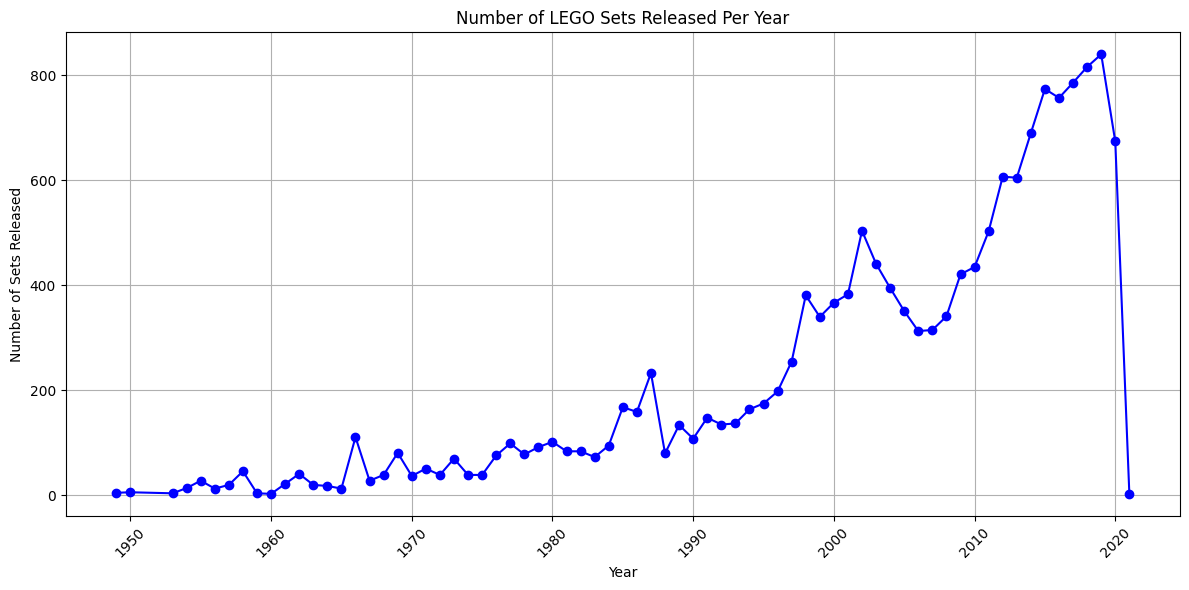

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Step 2: Create a Series with the number of sets released each year
sets_by_year = df.groupby('year')['set_num'].count()

# Step 3: Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(sets_by_year.index, sets_by_year.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Number of LEGO Sets Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


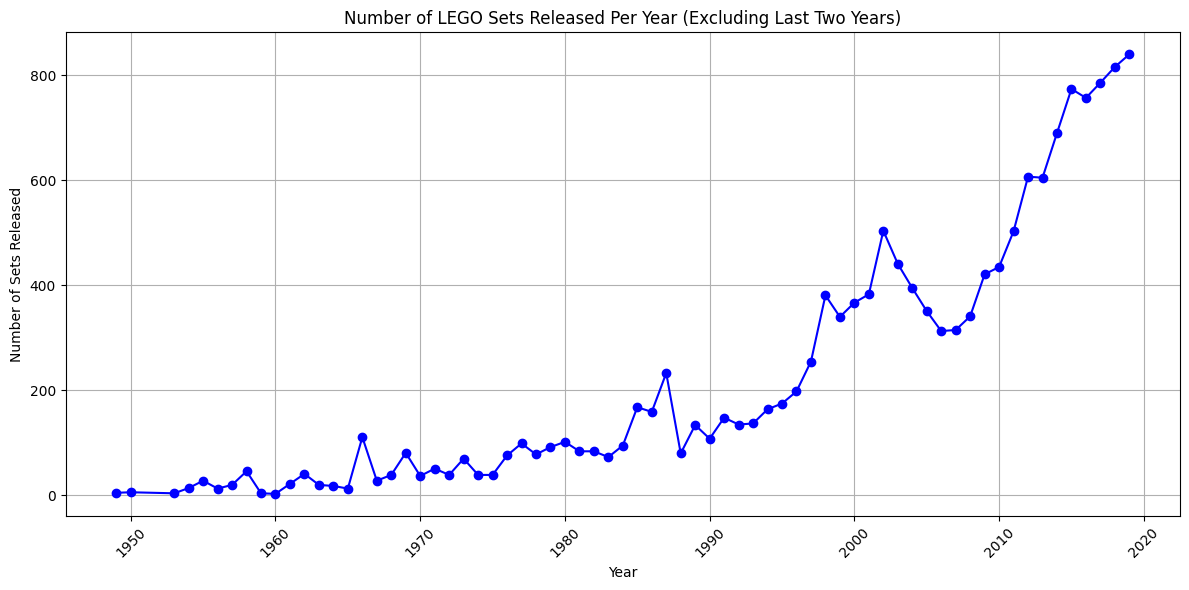

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Step 2: Create a Series with the number of sets released each year
sets_by_year = df.groupby('year')['set_num'].count()

# Step 3: Exclude the last two years from the Series
# Sorting the index to ensure correct slicing
sets_by_year = sets_by_year.sort_index()
sets_by_year_excluded = sets_by_year[:-2]  # Exclude the last two years

# Step 4: Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(sets_by_year_excluded.index, sets_by_year_excluded.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Number of LEGO Sets Released Per Year (Excluding Last Two Years)')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


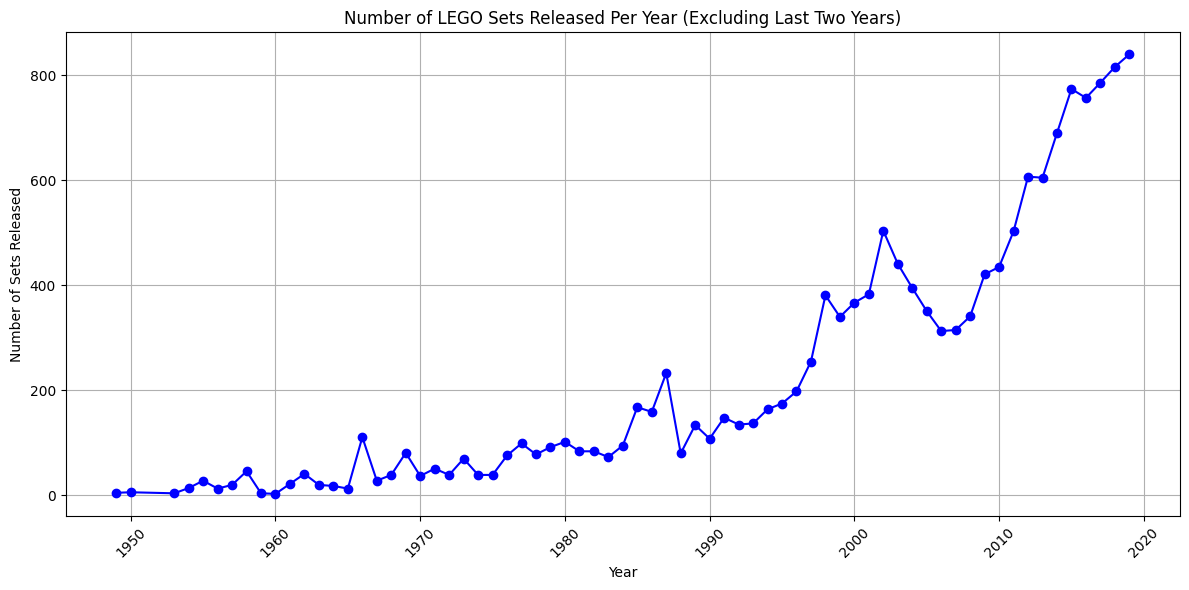

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Step 2: Group the data by 'year' and count the number of entries (sets) for each year
sets_by_year = df.groupby('year')['set_num'].count()

# Step 3: Exclude the last two years from the data
# Sorting the index to ensure correct slicing
sets_by_year = sets_by_year.sort_index()
sets_by_year_excluded = sets_by_year[:-2]  # Exclude the last two years

# Step 4: Plot the data using Matplotlib
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(sets_by_year_excluded.index, sets_by_year_excluded.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Number of LEGO Sets Released Per Year (Excluding Last Two Years)')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.grid(True)

# Adjust the layout to fit labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Step 2: Calculate the number of unique themes released each year
# Group by 'year' and aggregate the count of unique 'theme_id'
themes_by_year = df.groupby('year').agg({'theme_id': pd.Series.nunique})

# Rename the column for clarity
themes_by_year.rename(columns={'theme_id': 'unique_themes'}, inplace=True)

# Display the first few rows of the resulting Series
print("\nNumber of unique themes released each year:")
print(themes_by_year.head())


First few rows of the dataset:
  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

Number of unique themes released each year:
      unique_themes
year               
1949              2
1950              1
1953              2
1954              2
1955              4


First few rows of the dataset:
  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


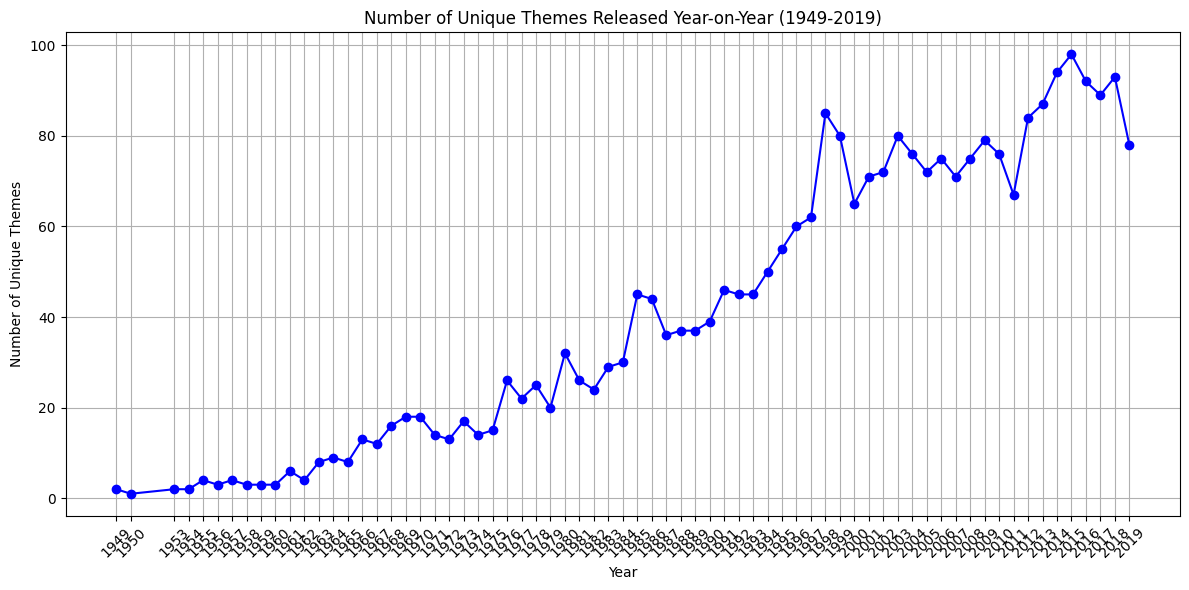

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Step 2: Calculate the number of unique themes released each year
# Group by 'year' and aggregate the count of unique 'theme_id'
themes_by_year = df.groupby('year').agg({'theme_id': pd.Series.nunique})

# Rename the column for clarity
themes_by_year.rename(columns={'theme_id': 'unique_themes'}, inplace=True)

# Filter the data to include only the full calendar years from 1949 to 2019
themes_by_year = themes_by_year.loc[1949:2019]

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(themes_by_year.index, themes_by_year['unique_themes'], marker='o', linestyle='-', color='b')
plt.title('Number of Unique Themes Released Year-on-Year (1949-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Themes')
plt.grid(True)
plt.xticks(themes_by_year.index, rotation=45)
plt.tight_layout()
plt.show()


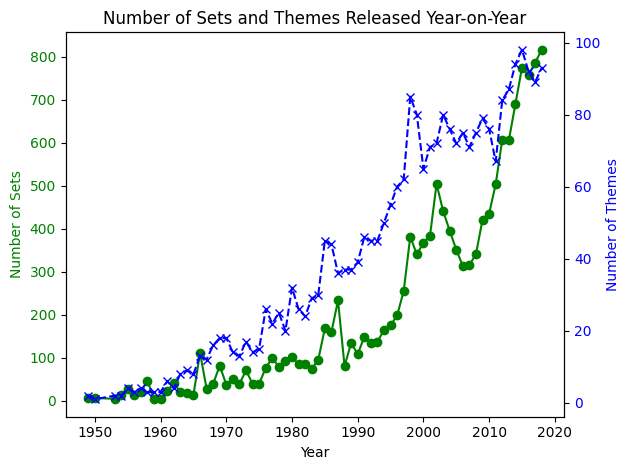

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the sets.csv file
file_path = 'data/sets.csv'
df = pd.read_csv(file_path)

# Step 2: Group by year to get the number of sets released each year
sets_by_year = df.groupby('year')['set_num'].count().reset_index(name='num_sets')

# Step 3: Group by year and count the number of unique themes released each year
themes_by_year = df.groupby('year')['theme_id'].nunique().reset_index(name='num_themes')

# Step 4: Slice the DataFrames to exclude the last two years \mj n
sets_by_year = sets_by_year[sets_by_year['year'] <= 2018]
themes_by_year = themes_by_year[themes_by_year['year'] <= 2018]

# Step 5: Create the plot
fig, ax1 = plt.subplots()

# Plot the number of sets on ax1
ax1.plot(sets_by_year['year'], sets_by_year['num_sets'], color='g', marker='o', linestyle='-', label='Number of Sets')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(themes_by_year['year'], themes_by_year['num_themes'], color='b', marker='x', linestyle='--', label='Number of Themes')
ax2.set_ylabel('Number of Themes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title
plt.title('Number of Sets and Themes Released Year-on-Year')

# Show the plot
fig.tight_layout()  # Adjust layout to prevent clipping
plt.show()


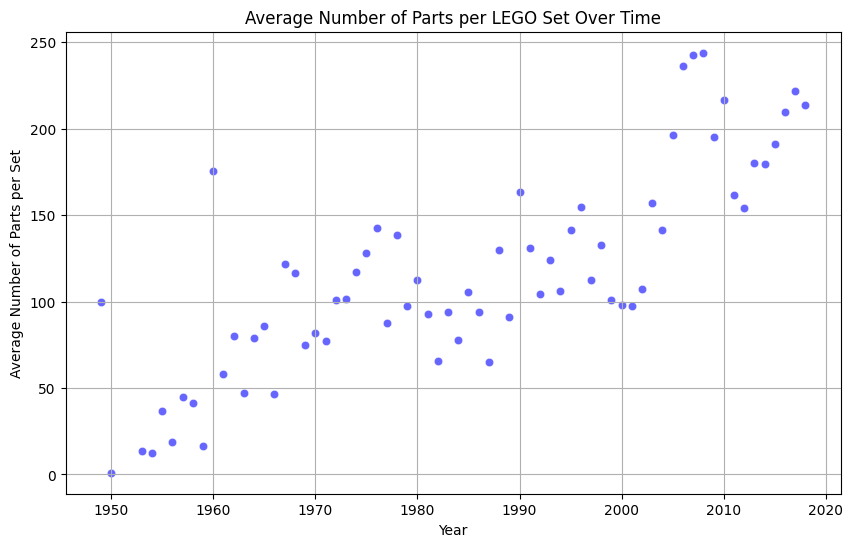

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sets.csv')

# Group by year and calculate the average number of parts per set
parts_per_set = df.groupby('year').agg({'num_parts': 'mean'}).reset_index()

# Exclude the last two observations
parts_per_set = parts_per_set[parts_per_set['year'] <= 2018]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(parts_per_set['year'], parts_per_set['num_parts'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Average Number of Parts per Set')
plt.title('Average Number of Parts per LEGO Set Over Time')
plt.grid(True)
plt.show()


<img src="https://i.imgur.com/Sg41cjx.png">

In [ ]:
import pandas as pd

# Load the data
themes = pd.read_csv('data/themes.csv')
sets = pd.read_csv('data/sets.csv')

# Explore the structure of themes.csv
print("Structure of themes.csv:")
print(themes.head())

# Search for 'Star Wars' in themes.csv
star_wars_themes = themes[themes['name'] == 'Star Wars']
print("\nStar Wars themes:")
print(star_wars_themes)

# Extract the theme_ids for 'Star Wars'
star_wars_theme_ids = star_wars_themes['id'].tolist()
print("\nStar Wars theme_ids:", star_wars_theme_ids)

# Find corresponding sets in sets.csv
star_wars_sets = sets[sets['theme_id'].isin(star_wars_theme_ids)]
print("\nStar Wars sets:")
print(star_wars_sets)
import pandas as pd

# Load the data
themes = pd.read_csv('data/themes.csv')
sets = pd.read_csv('data/sets.csv')

# Explore the structure of themes.csv
print("Structure of themes.csv:")
print(themes.head())

# Search for 'Star Wars' in themes.csv
star_wars_themes = themes[themes['name'] == 'Star Wars']
print("\nStar Wars themes:")
print(star_wars_themes)

# Extract the theme_ids for 'Star Wars'
star_wars_theme_ids = star_wars_themes['id'].tolist()
print("\nStar Wars theme_ids:", star_wars_theme_ids)

# Find corresponding sets in sets.csv
star_wars_sets = sets[sets['theme_id'].isin(star_wars_theme_ids)]
print("\nStar Wars sets:")
print(star_wars_sets)


Structure of themes.csv:
   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

Star Wars themes:
      id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0

Star Wars theme_ids: [18, 158, 209, 261]

Star Wars sets:
           set_num                                               name  year  \
850        11912-1                Star Wars: Build Your Own Adventure  2016   
855        11920-1  Parts for Star Wars Build Your Own Adventure: ...  2019   
1717       20006-1                            Clone Turbo Tank - Mini  2008   
1728       20007-1                     Republic Attack Cruiser - Mini  2009   
1738       20009-1                                AT-TE Walker - Mini  2009   
...            ...                                                ... 

   id  number_of_sets       name
0   1              50  Star Wars
1   2              30       City
2   3              20    Friends


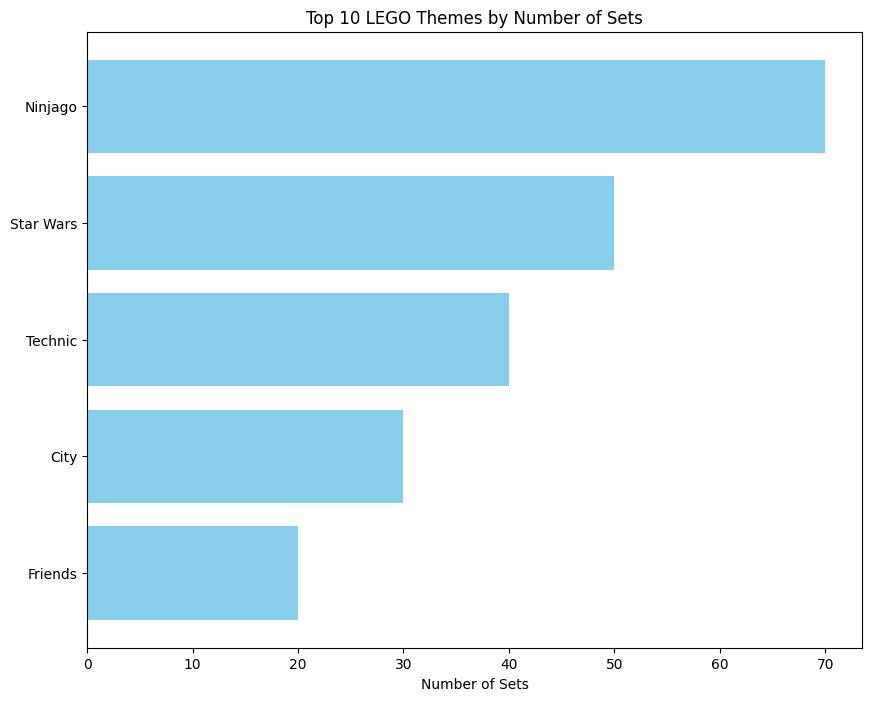

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
set_theme_count = pd.Series([50, 30, 20, 40, 70], index=[1, 2, 3, 4, 5])
themes = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['Star Wars', 'City', 'Friends', 'Technic', 'Ninjago']
})

# Convert Series to DataFrame
set_theme_count_df = set_theme_count.reset_index()
set_theme_count_df.columns = ['id', 'number_of_sets']

# Merge DataFrames on 'id'
merged_df = pd.merge(set_theme_count_df, themes, on='id')

# Print the first 3 rows of the merged DataFrame
print(merged_df.head(3))

# Sort by number of sets in descending order and select top 10
top_themes = merged_df.sort_values(by='number_of_sets', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_themes['name'], top_themes['number_of_sets'], color='skyblue')
plt.xlabel('Number of Sets')
plt.title('Top 10 LEGO Themes by Number of Sets')
plt.gca().invert_yaxis()  # Invert y-axis to have the theme with the most sets on top
plt.show()
